In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
import random


# loading facial expression dataset from Kaggle

In [18]:
testData = 'datasetPictures/test/test'
trainData = 'datasetPictures/train/train'
# def loadDataset(directory): 
#     imagePaths = []
#     labels = []

#     for label in os.listdir(directory):
#         for filename in os.listdir(directory+label): 
#             imagePath = os.path.join(directory, label, filename)
#             imagePaths.append(imagePath) #input: image
#             labels.append(label) #output: label

#         print(label, "Completed")
#     return imagePaths, labels

imagesTrain = []
labelsTrain = []
print("Loading Train Dataset")
for label in os.listdir(trainData):
    if not label.startswith('.DS'):
        for picture in os.listdir(trainData+'/'+label):
            picPath = os.path.join(trainData, label, picture)
            imagesTrain.append(picPath) #input: image
            labelsTrain.append(label) #output: label
    print(label, "Completed")

imagesTest = []
labelsTest = []
print("Loading Test Dataset")

for label in os.listdir(testData):
    if not label.startswith('.DS'):
        for picture in os.listdir(testData+'/'+label):
            picPath = os.path.join(testData, label, picture)
            imagesTest.append(picPath) #input: image
            labelsTest.append(label) #output: label
    print(label, "Completed")



Loading Train Dataset
happy Completed
.DS_Store Completed
sad Completed
fear Completed
surprise Completed
neutral Completed
angry Completed
disgust Completed
Loading Test Dataset
happy Completed
.DS_Store Completed
sad Completed
fear Completed
surprise Completed
neutral Completed
angry Completed
disgust Completed


# creating dataframe

In [19]:
# training
train = pd.DataFrame()
train ['image'] = imagesTrain
train['label'] = labelsTrain
# shuffle the dataset
train = train.sample(frac = 1).reset_index(drop = True) 
train.head()

,image,label
0,datasetPictures/train/train/happy/Training_927...,happy
1,datasetPictures/train/train/neutral/Training_8...,neutral
2,datasetPictures/train/train/surprise/Training_...,surprise
3,datasetPictures/train/train/happy/Training_180...,happy
4,datasetPictures/train/train/neutral/Training_7...,neutral


In [20]:
#testing
test = pd.DataFrame()
test ['image'] = imagesTest
test['label'] = labelsTest
test.head()

,image,label
0,datasetPictures/test/test/happy/PrivateTest_45...,happy
1,datasetPictures/test/test/happy/PrivateTest_61...,happy
2,datasetPictures/test/test/happy/PublicTest_536...,happy
3,datasetPictures/test/test/happy/PrivateTest_52...,happy
4,datasetPictures/test/test/happy/PublicTest_411...,happy


# Extracting Features

In [21]:
def extractFeatures(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    sampleSize = len(features)
    width = 48
    height = 48
    dimension = 1
    features = features.reshape(sampleSize, width, height, dimension)
    return features

trainFeatures = extractFeatures(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [22]:
testFeatures = extractFeatures(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

# Preprocessing data to convert labels (string) to integer values for CNN model

In [23]:
# normalize image so pixels can be in range of 0 and 1
xTrain = trainFeatures/255.0
xTest = testFeatures/255.0

# convert label to integer 
from  sklearn.preprocessing import LabelEncoder 
enc = LabelEncoder()
# stores corresponding mapping of label to an integer
enc.fit(train['label'])
# converts label (string) into an integer 
yTrain = enc.transform(train['label'])
yTest = enc.transform(test['label'])

yTrain = to_categorical(yTrain, num_classes = 7)
yTest = to_categorical(yTest, num_classes = 7)

# configuration 
width = 48
height = 48
dimension = 1
inputShape = (width, height, dimension)
outputClass = 7



In [24]:
yTrain[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

#  Building the Model

In [23]:
modelCNN = Sequential()

# Creating the convolutional layers
modelCNN.add(Conv2D(128, kernel_size=(3,3), activation="relu", input_shape=inputShape))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(0.4))

modelCNN.add(Conv2D(256, kernel_size=(3,3), activation="relu"))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(0.4))

modelCNN.add(Conv2D(512, kernel_size=(3,3), activation="relu"))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(0.4))

modelCNN.add(Conv2D(512, kernel_size=(3,3), activation="relu"))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(0.4))

modelCNN.add(Flatten())

# Connected Layers
modelCNN.add(Dense(512, activation='relu'))
modelCNN.add(Dropout(0.4))
modelCNN.add(Dense(256, activation='relu'))
modelCNN.add(Dropout(0.3))

# Output layer
modelCNN.add(Dense(outputClass, activation='softmax'))

modelCNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')


# Training the Model

In [24]:
history = modelCNN.fit(x=xTrain, y=yTrain, batch_size=128, epochs=1, validation_data=(xTest, yTest))


225/225 [==============================] - 822s 4s/step - loss: 1.8215 - accuracy: 0.2461 - val_loss: 1.8155 - val_accuracy: 0.2471


# Plotting Results

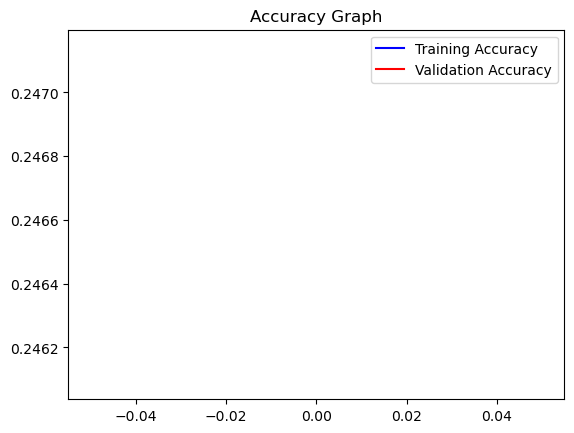

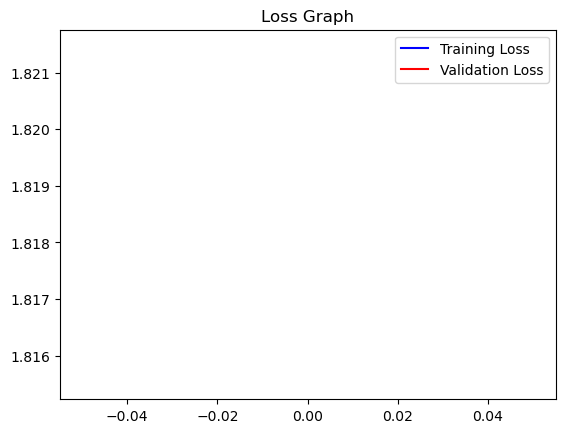

In [30]:
acc = history.history['accuracy']
valAcc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, valAcc, 'r', label='Validation Accuracy')
plt.title("Accuracy Graph")
plt.legend() # display label
plt.figure()

loss = history.history['loss']
valLoss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, valLoss, 'r', label='Validation Loss')
plt.title("Loss Graph")
plt.legend() # display label

plt.show()

# Testing the Model

Original Output: sad
1/1 [==============================] - 0s 50ms/step
Predicted Output: happy


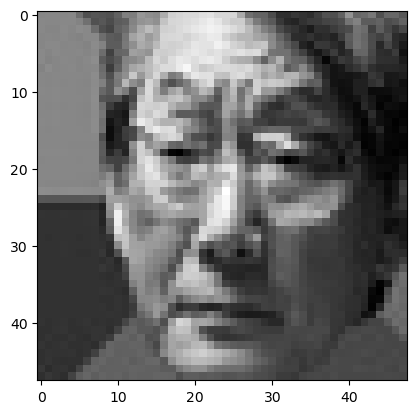

In [32]:
imageIndex = random.randint(0, len(test))
print("Original Output:", test['label'][imageIndex])

pred = modelCNN.predict(xTest[imageIndex].reshape(1, 48, 48, 1))
predictionLabel = enc.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", predictionLabel)

plt.imshow(xTest[imageIndex].reshape(48, 48), cmap='gray');

Original Output: sad
1/1 [==============================] - 0s 46ms/step
Predicted Output: happy


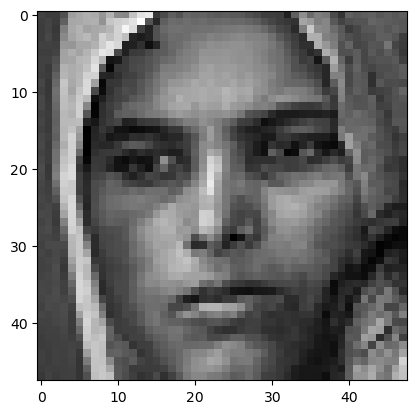

In [33]:
imageIndex = random.randint(0, len(test))
print("Original Output:", test['label'][imageIndex])

pred = modelCNN.predict(xTest[imageIndex].reshape(1, 48, 48, 1))
predictionLabel = enc.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", predictionLabel)

plt.imshow(xTest[imageIndex].reshape(48, 48), cmap='gray');